In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd

In [27]:
def make_data(f,xlim,train_n,test_n,seed=42):
    """
    生成所需数据

    Args:
        f: 待拟合函数
        xlim: 数据分布范围
        train_n: 训练集大小
        test_n: 测试集大小
        seed: 随机数种子
    """
    rng = np.random.default_rng(42)
    low,high=xlim
    train_x = rng.uniform(low,high,(train_n,1))
    test_x = rng.uniform(low,high,(test_n,1))
    train_y = f(train_x)
    test_y = f(test_x)
    return train_x,train_y,test_x,test_y

In [19]:
class myModel:
    def __init__(self):
        
        self.W1 = np.random.normal(0,1,size=[1+1, 100])
        self.W2 = np.random.normal(0,1,size=[100, 1])
        
        self.mul_h1 = Matmul()
        self.mul_h2 = Matmul()
        self.relu = Relu()
        
        
    def forward(self, x):
        x = x.reshape(-1, 1)
        bias = np.ones(shape=[x.shape[0], 1])
        x = np.concatenate([x, bias], axis=1)
        
        self.h1 = self.mul_h1.forward(x, self.W1)
        self.h1_relu = self.relu.forward(self.h1)
        self.out = self.mul_h2.forward(self.h1_relu, self.W2)
            
    def backward(self, label):
        self.h2_grad, self.W2_grad = self.mul_h2.backward(self.out-label)
        self.h1_relu_grad = self.relu.backward(self.h2_grad)
        self.h1_grad, self.W1_grad = self.mul_h1.backward(self.h1_relu_grad)


In [39]:
def compute_loss(logits, labels):
     return np.mean(0.5*(logits-labels)**2)
    
def train_one_step(model, x, y):
    model.forward(x)
    model.backward(y)
    model.W1 -= 1e-5* model.W1_grad
    model.W2 -= 1e-5* model.W2_grad
    loss = compute_loss(model.out, y)
    return loss

def test(model, x, y):
    model.forward(x)
    loss = compute_loss(model.out, y)
    return loss



In [87]:
def fit_and_plot(f,xlim,train_n,test_n,ax,epoch):
    xlim = (-1,1)
    train_x,train_y,test_x,test_y = make_data(f,xlim,train_n,test_n)
    train_x,test_x = train_x,test_x
    model = myModel()
    for epoch in range(epoch):
        loss = train_one_step(model,train_x , train_y)
        print('epoch', epoch, ': loss', loss )
    loss = test(model, test_x, test_y)
    print('test loss', loss, '; loss', loss)
    x = np.linspace(*xlim,1000)
    ax.plot(x,f(x),label="f")
    ax.scatter(test_x,model.out,label="prediction")
    ax.legend(loc="best")
    return loss


In [88]:
df = pd.DataFrame(
    columns=[1000,2000,3000,4000],
    index=[
        "x^2",
        "sin(x)",
        "1/x",
        "|x|",
    ]
)

epoch 0 : loss 20.623183234066797
epoch 1 : loss 12.189194009529968
epoch 2 : loss 8.155200308851862
epoch 3 : loss 5.836024039046401
epoch 4 : loss 4.321188721946996
epoch 5 : loss 3.258564552082544
epoch 6 : loss 2.4867681571021647
epoch 7 : loss 1.9166305192662783
epoch 8 : loss 1.492151962208418
epoch 9 : loss 1.1746361997293202
epoch 10 : loss 0.9361915212234164
epoch 11 : loss 0.7563860749848166
epoch 12 : loss 0.6203785135685475
epoch 13 : loss 0.5172056968859584
epoch 14 : loss 0.4385279497883411
epoch 15 : loss 0.3781572252576999
epoch 16 : loss 0.33145611579023837
epoch 17 : loss 0.2950257817082797
epoch 18 : loss 0.26632781933529415
epoch 19 : loss 0.2434542712441775
epoch 20 : loss 0.22499441588548677
epoch 21 : loss 0.209875808808437
epoch 22 : loss 0.1973039904051204
epoch 23 : loss 0.18667677594884965
epoch 24 : loss 0.17755678937063868
epoch 25 : loss 0.1696044148162164
epoch 26 : loss 0.16256968851694023
epoch 27 : loss 0.15625454690853058
epoch 28 : loss 0.15051047633

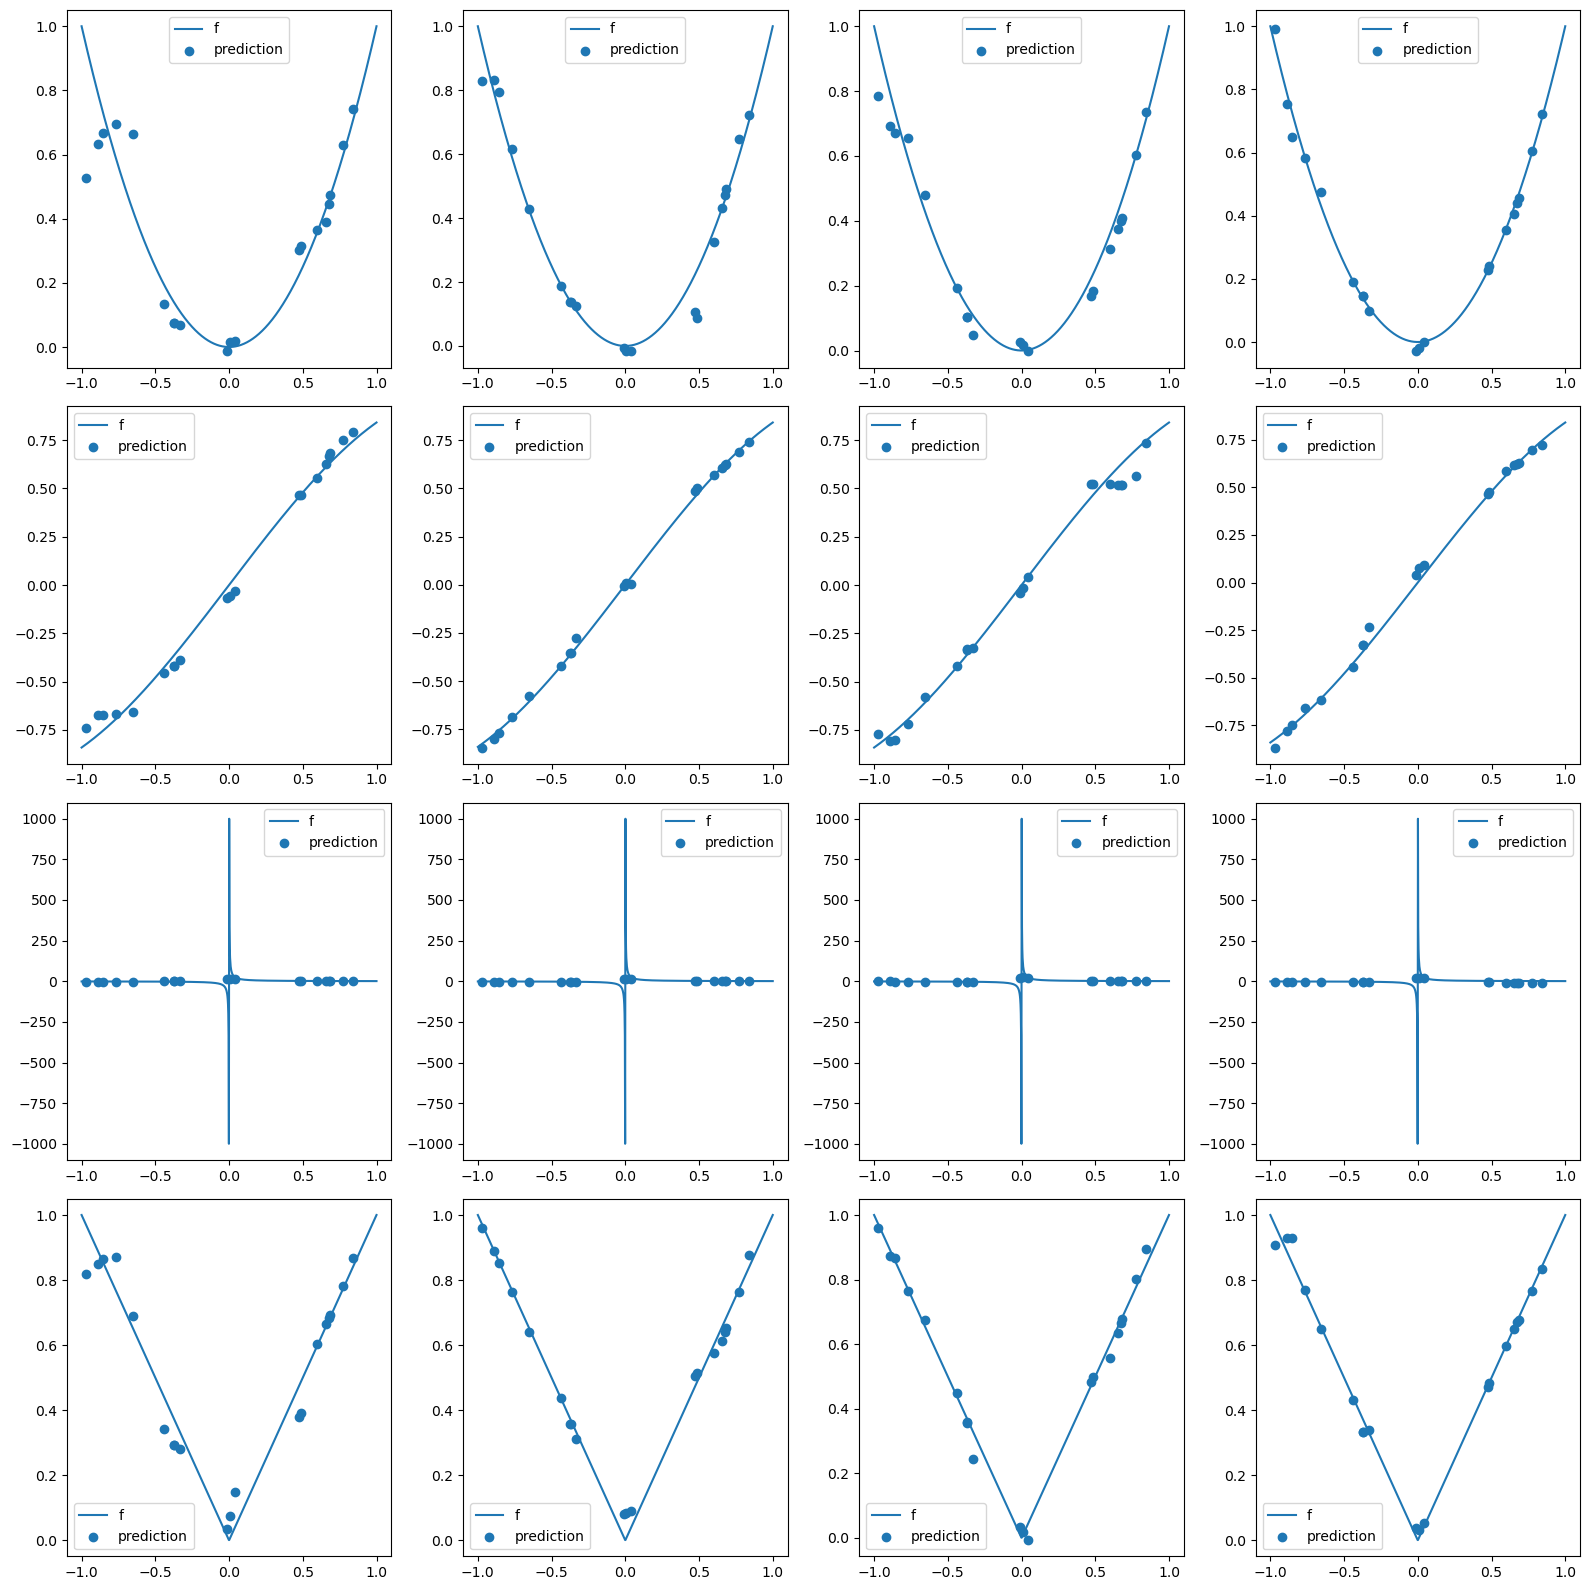

In [89]:
fig = plt.figure(figsize=(16,16))
for i,(f,epoch) in enumerate(
    product(
        [
            lambda x:x**2,
            lambda x:np.sin(x),
            lambda x:1/x,
            lambda x:np.abs(x)
        ],
        [1000,2000,3000,4000]
    )
):
    ax = plt.subplot2grid((4,4),(i//4,i%4))
    loss = fit_and_plot(f,(-1,1),500,20,ax,epoch)
    df.iloc[i//4,i%4] = loss
fig.tight_layout()

In [90]:
df

,1000,2000,3000,4000
x^2,0.007457,0.001498,0.001751,0.000387
sin(x),0.001554,0.00022,0.001757,0.000643
1/x,633.019701,618.147402,608.366914,624.513888
|x|,0.002418,0.000548,0.000447,0.000392


# 实验报告

## 函数定义

本次实验共测试了4种函数：

1. $f(x)=x^2$
2. $f(x)=\sin(x)$
3. $f(x)=1/x$
4. $f(x)=\lvert x\rvert$

## 数据采集

- 定义域统一设置为$(0,1)$，并采用均匀分布来对自变量$x$进行采样
- 训练集大小为500，测试集为20

## 模型描述

本次实验所采用的模型为一个两层的ReLU网络，用numpy实现

## 拟合效果

对于各个函数，均尝试训练1000，2000，3000，4000个epoch以观察不同epoch对应的效果。

在测试集上得到的loss值如`df`所示，拟合效果可视化如上图所示。

可以看到，除了$1/x$以外，其余三个函数拟合效果较好。$1/x$拟合效果较差的原因是因为采样的自变量范围内存在奇点$x=0$。